1. Write a function that converts number representation (bin<->dec<->hex)

In [1]:
def conversion():
    choice = str(input("Convert the number from --> dec for decimal, bin for binary, hex for hexadecimal: "))
    
    if choice == "bin":     
        try:
            num = int(input("Input binary value: "), 2)
            print("Decimal format: ", num)
            print("Binary format: ", bin(num))
            print("Hexadecimal format: ", hex(num)) 
        except ValueError:
            print("Please input only binary value...")
    elif choice == "hex":
        try:
            num = int(input("Input hexadecimal value: "), 16)
            print("Decimal format: ", num)
            print("Binary format: ", bin(num))
            print("Hexadecimal format: ", hex(num)) 
        except ValueError:
            print("Please input only hexadecimal value...")
    elif choice == "dec":
        try:
            num = int(input("Input decimal value: "))
            print("Decimal format: ", num)
            print("Binary format: ", bin(num))
            print("Hexadecimal format: ", hex(num)) 
        except ValueError:
            print("Please input only decimal value...")
    else: print("Please type dec, bin or hex")
        
conversion()

Convert the number from --> dec for decimal, bin for binary, hex for hexadecimal: dec
Input decimal value: 65
Decimal format:  65
Binary format:  0b1000001
Hexadecimal format:  0x41


2\. Write a function that converts a 32 bit word into a single precision floating point (i.e. interprets the various bits as sign, mantissa and exponent)

In [2]:
import struct
# 01000001101011000111101011100001 32 bit example word
def bit():
    f = str(input())
    f = int(f, 2)
    print(struct.unpack('f', struct.pack('I', f))[0])
bit()

01000001101011000111101011100001
21.559999465942383


3\. Write a program to determine the underflow and overflow limits (within a factor of 2) for python on your computer. 

**Tips**: define two variables inizialized to 1 and halve/double them enough time to exceed the under/over-flow limits  

In [3]:
import sys
under, over = 1., 1.
first_under, first_over = True, True
N = 1500
for i in range(N+1):
    under = under / 2
    if under < sys.float_info.min:
        if first_under:
            print("Underflow limit reached at iteration # {}".format(i))
            first_under = False
    over = over*2
    if over > sys.float_info.max:
        if first_over:
            print("Overflow limit reached at iteration # {}".format(i))
            first_over = False

Underflow limit reached at iteration # 1022
Overflow limit reached at iteration # 1023


4\. Write a program to determine the machine precision

**Tips**: define a new variable by adding a smaller and smaller value (proceeding similarly to prob. 2) to an original variable and check the point where the two are the same 

In [4]:
N, eps, unit = 100, 1.0, 1.0
for i in range(N):
    eps = eps / 2
    one = 1.0 + eps
    if one.hex() == unit.hex():
        print("Machine precision exceeded at iteration #: ", i, ", with epsilon: ", eps, ", one: ", one)
        break

Machine precision exceeded at iteration #:  52 , with epsilon:  1.1102230246251565e-16 , one:  1.0


5\. Write a function that takes in input three parameters $a$, $b$ and $c$ and prints out the two solutions to the quadratic equation $ax^2+bx+c=0$ using the standard formula:
$$
x=\frac{-b\pm\sqrt{b^2-4ac}}{2a}
$$

(a) use the program to compute the solution for $a=0.001$, $b=1000$ and $c=0.001$

(b) re-express the standard solution formula by multiplying top and bottom by $-b\mp\sqrt{b^2-4ac}$ and again find the solution for $a=0.001$, $b=1000$ and $c=0.001$. How does it compare with what previously obtained? Why?

(c) write a function that compute the roots of a quadratic equation accurately in all cases

In [5]:
from math import sqrt

def quadratic_a(a, b, c):
    d = sqrt(b**2 - 4*a*c)
    return ((-b + d)/(2*a), (-b - d)/(2*a))

def quadratic_b(a, b, c):
    d = sqrt(b**2 - 4*a*c)
    return (2*c / (-b - d), 2*c/(-b + d))
"""
Loss of significance is occuring in the first (for quadratic_a) and the second (for quadratic_b) of the root calculations;
because of the subtraction, the quadratic equation doesn't constitute a stable algorithm.
A stable solution is given by using both algorithms to calculate (for each) the right square root.
    
"""
def quadratic_c(a, b, c):
    d = sqrt(b**2 - 4*a*c)
    return (2*c/(-b - d), (-b - d)/(2*a))

print(quadratic_a(0.001,1000,0.001))
print(quadratic_b(0.001,1000,0.001))
print(quadratic_c(0.001,1000,0.001))

(-9.999894245993346e-07, -999999.999999)
(-1.000000000001e-06, -1000010.5755125057)
(-1.000000000001e-06, -999999.999999)


6\. Write a program that implements the function $f(x)=x(x−1)$

(a) Calculate the derivative of the function at the point $x = 1$ using the derivative definition:

$$
\frac{{\rm d}f}{{\rm d}x} = \lim_{\delta\to0} \frac{f(x+\delta)-f(x)}{\delta}
$$

with $\delta = 10^{−2}$. Calculate the true value of the same derivative analytically and compare with the answer your program gives. The two will not agree perfectly. Why not?

(b) Repeat the calculation for $\delta = 10^{−4}, 10^{−6}, 10^{−8}, 10^{−10}, 10^{−12}$ and $10^{−14}$. How does the accuracy scales with $\delta$?

[1.0000999999998899, 1.0000009999177333, 1.0000000039225287, 1.000000082840371, 1.0000889005833413, 0.9992007221626509]


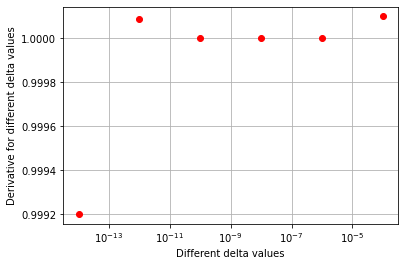

In [6]:
import matplotlib.pyplot as plt
import numpy as np
def f(x):
    return x*(x-1)

d, x = [], []
for i in range(2,8): #substitute 8->9 to see the value drop to 0
    delta = pow(10,-2*i)
    deriv = (f(1 + delta) - f(1)) / delta
    d.append(deriv)
    x.append(delta)
print(d)
"""
The analitical value of the derivative in x = 1 is 1; there is a loss of significance due to the subtraction of two terms
very close in value, namely f(x + delta) and f(x). The different values of d/dx(f(x)) are shown in the graph, starting
from delta = e-4; for e-16 the value drops to 0.

"""
plt.plot(x, d, "ro")
plt.ylabel("Derivative for different delta values")
plt.xlabel("Different delta values")
plt.xscale("log")
plt.grid(True)

7\. Consider the integral of the semicircle of radius 1:
$$
I=\int_{-1}^{1} \sqrt(1-x^2) {\rm d}x
$$
which it's known to be $I=\frac{\pi}{2}=1.57079632679...$.
Alternatively we can use the Riemann definition of the integral:
$$
I=\lim_{N\to\infty} \sum_{k=1}^{N} h y_k 
$$

with $h=2/N$ the width of each of the $N$ slices the domain is divided into and where
$y_k$ is the value of the function at the $k-$th slice.

(a) Write a programe to compute the integral with $N=100$. How does the result compares to the true value?

(b) How much can $N$ be increased if the computation needs to be run in less than a second? What is the gain in running it for 1 minute? 


In [7]:
from math import sqrt, pi
import numpy as np
import time

def f(x):
    return sqrt(1 - x**2)

def integral(N):
    h = 2 / N
    I, a, b = 0, -1, 1
    h = 2 / N
    I, a, b = 0, -1, 1
    for k in range(1, N+1):
        x_k = a + (2*k - 1) / N
        I += f(x_k)
    print(I*h)
    epsilon = np.abs((((2*I*h) / pi) - 1)*100)
    print("The percentage error to the true value is {}%".format(epsilon))
    
start_time = time.time()
integral(100)
end_time = time.time()
print("The execution time for 100 calls is: {:e}s".format(end_time-start_time))

start_time = time.time()
integral(5000000)
end_time = time.time()
print("The execution time for 5e6 calls is: {:e}s".format(end_time-start_time))

1.5712827762297956
The percentage error to the true value is 0.03096833285138878%
The execution time for 100 calls is: 1.138449e-03s
1.5707963268383698
The percentage error to the true value is 2.7675861602460827e-09%
The execution time for 5e6 calls is: 3.861414e+00s


In [8]:
start_time = time.time()
integral(500000000)
end_time = time.time()
print("The execution time for 5e8 calls is: {:e}s".format(end_time-start_time))
#the gain in precision is roughly of 2 orders of magnitude

1.5707963267962712
The percentage error to the true value is 8.750777880095484e-11%
The execution time for 5e8 calls is: 5.092002e+02s
